<a href="https://colab.research.google.com/github/jroshanjha/BOOTSTRAP-WEBSITE/blob/main/regression_with_Deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# Load All Required Libraries.....
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.datasets import make_classification, load_iris

import matplotlib.pyplot as plt

import matplotlib as cm

import keras

from keras.models import Sequential

from keras.layers import Dense

from sklearn.preprocessing import StandardScaler,LabelBinarizer

from sklearn.utils import shuffle

sns.set(color_codes = True)



In [31]:
# Load Iris data Set....
data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [32]:
# Iris dataset in Pandas Data Frame......
data = pd.DataFrame(data =np.c_[data['data'],data['target']],columns=data['feature_names']+['target'])

data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


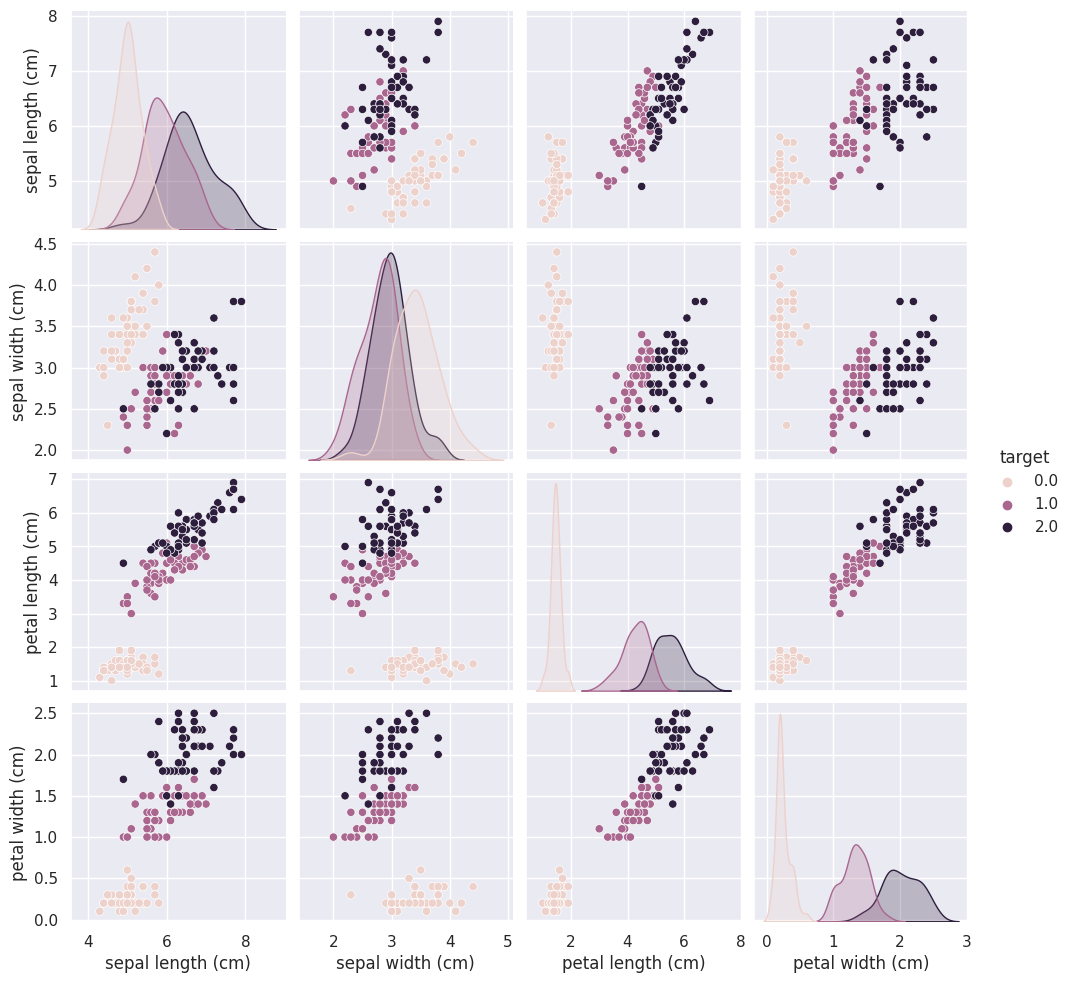

In [33]:
# Analaytics for pairplot each column to corresponding row and columns
sns.pairplot(data= data[data.columns[0:6]],hue='target')
plt.show()

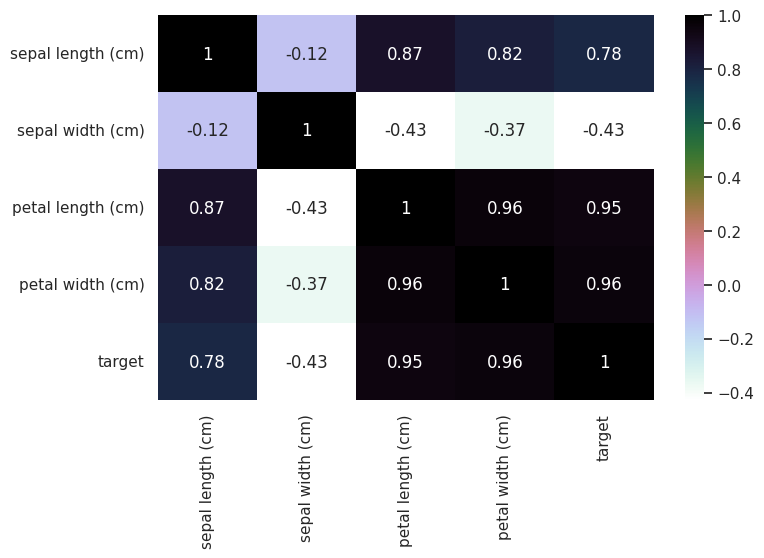

In [34]:
# Analaytics Headmap for checking best accuracy
plt.figure(figsize=(8,5))
sns.heatmap(data.corr(),annot=True,cmap='cubehelix_r')
plt.show()

In [35]:
# Suffle Iris Data Set
data = shuffle(data)

# Sepratly data and target column

In [36]:
x = data[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]

y = data[['target']]

y_true = y.copy()

In [37]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
54,6.5,2.8,4.6,1.5
81,5.5,2.4,3.7,1.0
31,5.4,3.4,1.5,0.4
134,6.1,2.6,5.6,1.4
102,7.1,3.0,5.9,2.1
...,...,...,...,...
133,6.3,2.8,5.1,1.5
56,6.3,3.3,4.7,1.6
22,4.6,3.6,1.0,0.2
20,5.4,3.4,1.7,0.2


In [38]:
y

,target
54,1.0
81,1.0
31,0.0
134,2.0
102,2.0
...,...
133,2.0
56,1.0
22,0.0
20,0.0


Train The Model

In [39]:
# Train The Model
x = StandardScaler().fit_transform(x)
y = LabelBinarizer().fit_transform(y)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,mean_squared_error,accuracy_score

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 101)

In [41]:
model = Sequential()

model.add(Dense(64, input_dim=4, activation='relu'))
model.add(Dense(units=15, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=3, activation='softmax'))  # Change units to 3 for three classes

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=120, validation_data=(x_test, y_test))

Epoch 1/120
4/4 [==============================] - 2s 108ms/step - loss: 1.0849 - accuracy: 0.3500 - val_loss: 1.0741 - val_accuracy: 0.5000
Epoch 2/120
4/4 [==============================] - 0s 29ms/step - loss: 1.0564 - accuracy: 0.5333 - val_loss: 1.0493 - val_accuracy: 0.5333
Epoch 3/120
4/4 [==============================] - 0s 23ms/step - loss: 1.0274 - accuracy: 0.6167 - val_loss: 1.0134 - val_accuracy: 0.6000
Epoch 4/120
4/4 [==============================] - 0s 23ms/step - loss: 0.9929 - accuracy: 0.6750 - val_loss: 0.9778 - val_accuracy: 0.6000
Epoch 5/120
4/4 [==============================] - 0s 19ms/step - loss: 0.9589 - accuracy: 0.6750 - val_loss: 0.9436 - val_accuracy: 0.6000
Epoch 6/120
4/4 [==============================] - 0s 26ms/step - loss: 0.9225 - accuracy: 0.6750 - val_loss: 0.9100 - val_accuracy: 0.6000
Epoch 7/120
4/4 [==============================] - 0s 22ms/step - loss: 0.8856 - accuracy: 0.6833 - val_loss: 0.8746 - val_accuracy: 0.6000
Epoch 8/120
4/4 [==

In [42]:
y_pred = model.predict(x_test)

y_test

y_test = np.argmax(y_test,axis=1)

1/1 [==============================] - 0s 71ms/step


In [45]:
# cm = confusion_matrix(y_test.tolist(),y_pred.tolist())

y_true = np.argmax(y_test, axis=1) if len(y_test.shape) > 1 else y_test

# Assuming y_pred is obtained using model.predict as shown in the previous response
y_pred = np.argmax(model.predict(x_test), axis=1)

cm = confusion_matrix(y_true, y_pred)

1/1 [==============================] - 0s 106ms/step


[Text(0, 0.5, 'setosa'), Text(0, 1.5, 'versicolor'), Text(0, 2.5, 'verginica')]

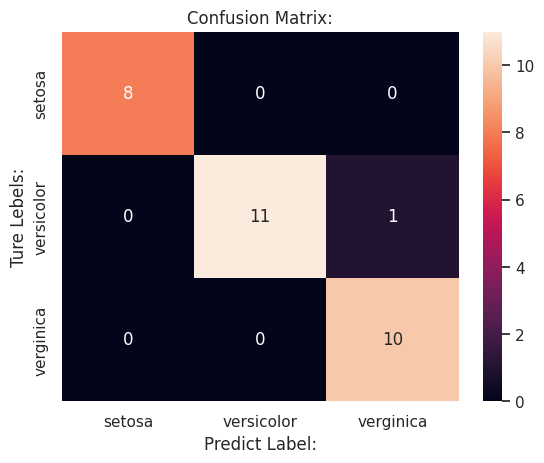

In [46]:
ax = plt.subplot()
sns.heatmap(cm,annot=True,ax = ax)

ax.set_xlabel('Predict Label:'); ax.set_ylabel('Ture Lebels:')
ax.set_title('Confusion Matrix:');
ax.xaxis.set_ticklabels(['setosa','versicolor','verginica'])
ax.yaxis.set_ticklabels(['setosa','versicolor','verginica'])

In [47]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test.tolist(),y_pred.tolist(),average='macro')

(0.9696969696969697, 0.9722222222222222, 0.9696342305037957, None)

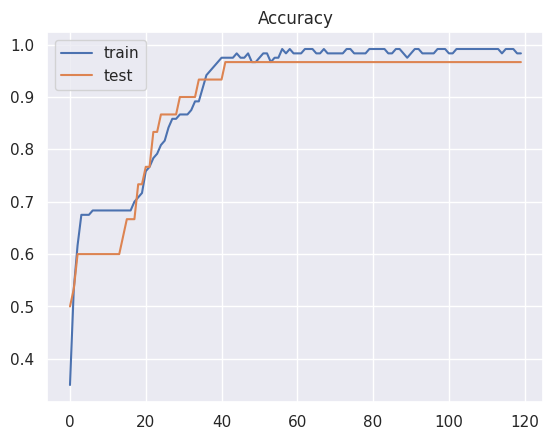

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train','test'])
plt.show()

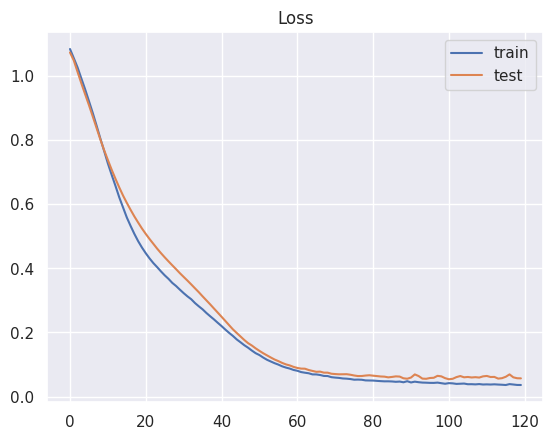

In [49]:
# history.history

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'])
plt.show()